신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
#케라스와 텐서플로에서 랜덤 시드를 설정하고 텐서플로 연산을 결정적으로 만드는 부분

import tensorflow as tf

tf.keras.utils.set_random_seed(42) #케라스에 랜덤 시드 설정
tf.config.experimental.enable_op_determinism() #텐서플로 연산을 결정적으로 만듦

손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

#Fashion MNIST 데이터셋 로드 (이미지와 각 이미지의 레이블로 구성)
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

#픽셀 값의 범위를 0에서 1사이로 조정
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential() #Sequential 모델 생성
    model.add(keras.layers.Flatten(input_shape=(28, 28))) #입력 데이터를 평평하게 만드는 Flatten. 28x28 크기의 2D 배열 -> 1D 배열로 변환
    model.add(keras.layers.Dense(100, activation='relu')) # 100개의 뉴런을 가지는 은닉층 추가, 활성화 함수로 ReLU
    if a_layer:
        model.add(a_layer) #입력으로 받은 레이어를 모델에 추가
    model.add(keras.layers.Dense(10, activation='softmax')) #출력층으로 10개의 뉴런을 가지는 층 추가, 활성화 함수로 softmax를 사용하여 각 클래스에 대한 확률 출력
    return model

In [4]:
model = model_fn()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


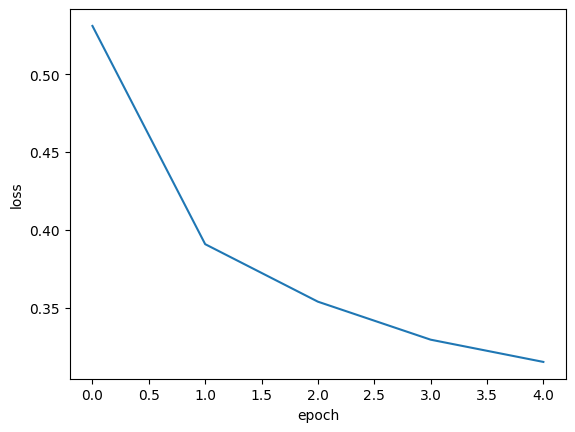

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

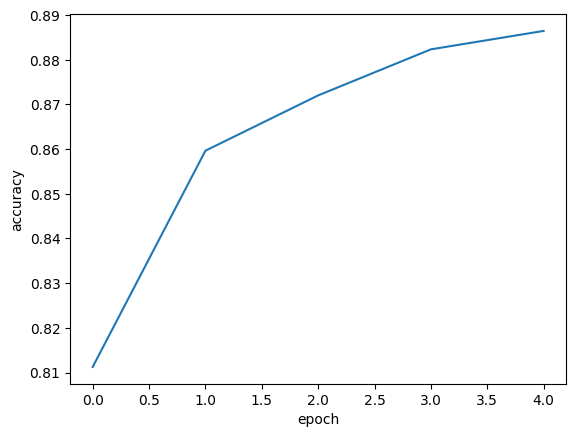

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

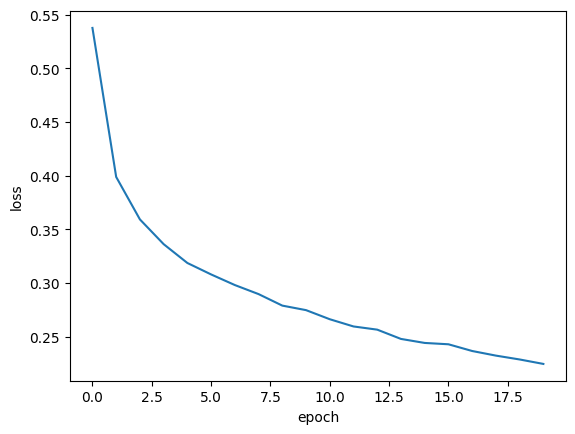

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증 손실

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


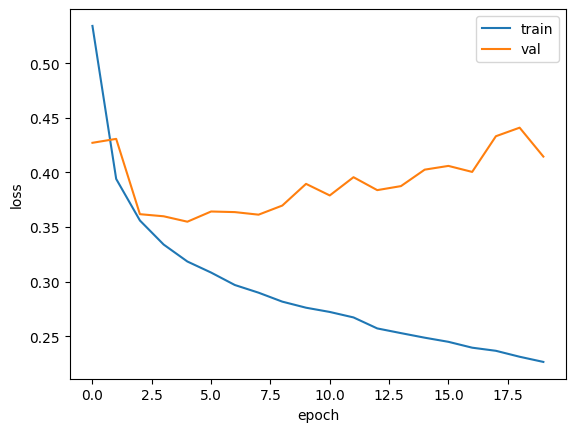

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

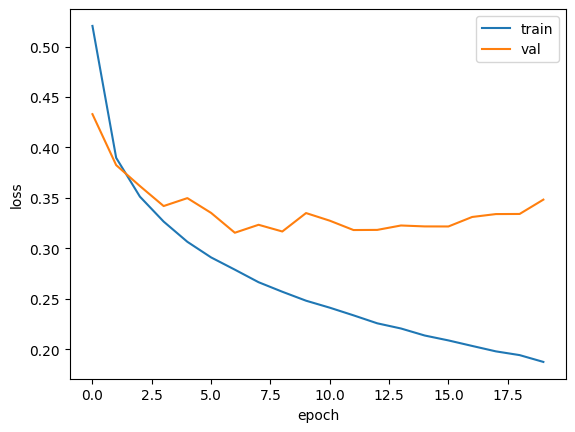

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃

In [16]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

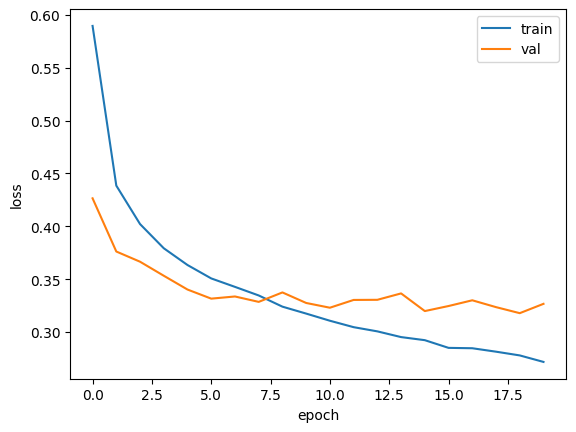

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

모델 저장과 복원

In [41]:
#드롭아웃을 포함한 모델을 생성하고 Adam 옵티마이저를 사용하여 훈련

model = model_fn(keras.layers.Dropout(0.3)) #드롭아웃 레이어(=30%의 뉴런을 무작위로 비활성화시켜 과적합을 줄이는 역할)를 포함한 모델 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target)) #훈련 데이터를 사용하여 10번의 에포크 동안 학습. verbose=0: 훈련 과정을 출력하지 않음

In [42]:
model.save_weights('model-weights.h5') #모델의 가중치를 파일로 저장

In [54]:
model.save('model-whole.h5') #전체 모델을 파일로 저장

c:\Users\tjoeun\miniconda3\envs\mltest2\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
model.save('my_model.h5')

In [44]:
!ls -al *.h5

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [45]:
model = model_fn(keras.layers.Dropout(0.3)) #드롭아웃 레이어를 포함한 모델 생성

model.load_weights('model-weights.h5') #모델의 가중치를 파일에서 불러옴

In [46]:
#검증 데이터에 대한 예측을 수행하고, 예측 결과를 실제 레이블과 비교하여 정확도를 계산

import numpy as np

#검증된 데이터에 대한 예측을 수행하고, 각 샘플에 대한 예측된 클래스를 추출
#axis=-1: 마지막 차원을 기준으로 가장 큰 값의 인덱스를 추출
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

#예측된 레이블과 실제 레이블을 비교하여 정확도 계산
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 891us/step
0.8758333333333334


In [57]:
model = keras.models.load_model('my_model.h5')

In [58]:
# model = keras.models.load_model('./model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3248 - accuracy: 0.8867


[0.3248404264450073, 0.8866666555404663]

콜백

In [62]:
model = model_fn(keras.layers.Dropout(0.3)) #과적합을 방지하기 위해 훈련 중에 무작위로 일부 뉴런을 비활성화시키는 데 사용되는 '드롭아웃'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy') #모델의 평가지표=accuracy

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

#콜백으로 'ModelCheckpoint'를 사용하여 최상의 모델을 저장하도록 설정
#verbose=0: 훈련 과정에서 출력이 표시되지 않도록 설정

In [63]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8845


[0.31769102811813354, 0.8845000267028809]

In [64]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [65]:
print(early_stopping_cb.stopped_epoch)

7


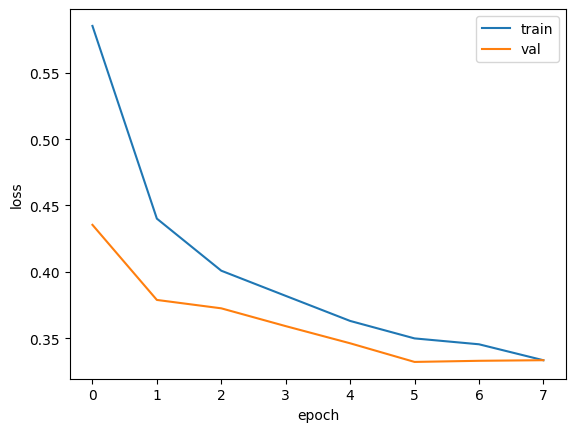

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [68]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8799


[0.3320746123790741, 0.8799166679382324]